In [ ]:
# KERAS
# TENSORFLOW
# CAFFE2
# PYTORCH

In [ ]:
# KERAS

In [ ]:
# # Each image is a 28 by 28 pixel square (784 pixels total).

In [ ]:


# COMPUTER VISION - MNIST DIGIT DATASET

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [2]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 10)                1

In [3]:
batch_size = 128
epochs = 3

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/3
422/422 [==============================] - 64s 149ms/step - loss: 0.3805 - accuracy: 0.8817 - val_loss: 0.0769 - val_accuracy: 0.9792
Epoch 2/3
422/422 [==============================] - 59s 140ms/step - loss: 0.1083 - accuracy: 0.9669 - val_loss: 0.0527 - val_accuracy: 0.9857
Epoch 3/3
422/422 [==============================] - 59s 139ms/step - loss: 0.0837 - accuracy: 0.9741 - val_loss: 0.0459 - val_accuracy: 0.9882


In [4]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04291160777211189
Test accuracy: 0.986299991607666


In [55]:

# Predicting the Test set results
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.3)
y_pred
from sklearn import metrics
# Creating the Confusion Matrix
matrix = metrics.confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1))
matrix

array([[ 977,    0,    0,    0,    0,    0,    1,    1,    1,    0],
       [   0, 1133,    1,    1,    0,    0,    0,    0,    0,    0],
       [   2,    6, 1018,    1,    1,    0,    0,    2,    2,    0],
       [   0,    0,    3, 1002,    0,    1,    0,    3,    1,    0],
       [   1,    0,    1,    0,  978,    0,    1,    0,    0,    1],
       [   2,    1,    1,   12,    0,  872,    2,    1,    1,    0],
       [   7,    3,    0,    0,    2,    2,  943,    0,    1,    0],
       [   1,    5,   12,    3,    0,    0,    0, 1005,    1,    1],
       [   5,    0,    3,    1,    1,    1,    2,    3,  956,    2],
       [   4,    5,    0,    3,   11,    6,    0,    6,    2,  972]],
      dtype=int64)

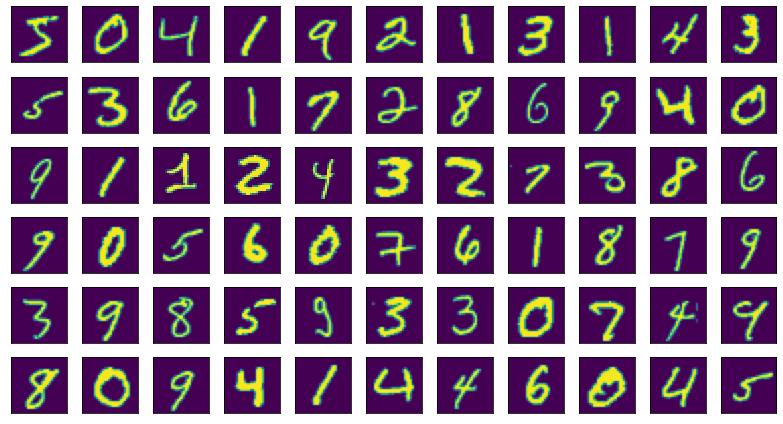

In [7]:
# Now lets take a look at some of our triaining images!
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
for i in range(66): 
    plt.subplot(6,11,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()

In [44]:
predicted_classesB = model.predict(x_test)

predicted_classes = np.argmax(predicted_classesB,axis=1)
print(predicted_classes)
print(len(predicted_classes))

[7 2 1 ... 4 5 6]
10000


In [75]:
# load the model and create predictions on the test set

# THIS CODE NEED TO BE IMPROVED !!!!!!! 

Y_pred2 = model.predict(x_test)

Y_pred = np.argmax(Y_pred2,axis=1)

# DEBUG
#print(len(predicted_classes))
#print(len(y_test))
#print(y_test[0])
#print(y_test[1])

#Y_pred

correct_indices = []
incorrect_indices = []

index = 0
for y_predtest in Y_pred:
    #print(xclass)
    # max index
    ##print(index)
    #print(y_predtest," == ",np.argmax(y_test[index] )) # logic finally succesful after 2+ hours, Hmmm
       
     
    if(y_predtest == np.argmax(y_test[index]) ) :
        correct_indices.append(y_predtest)
    else:
        pass
        #incorrect_indices.append(xclass)
    index = index+1
    

# Test our code
print(len(correct_indices))
#print(len(incorrect_indices))


9863


In [49]:
#correct_indices

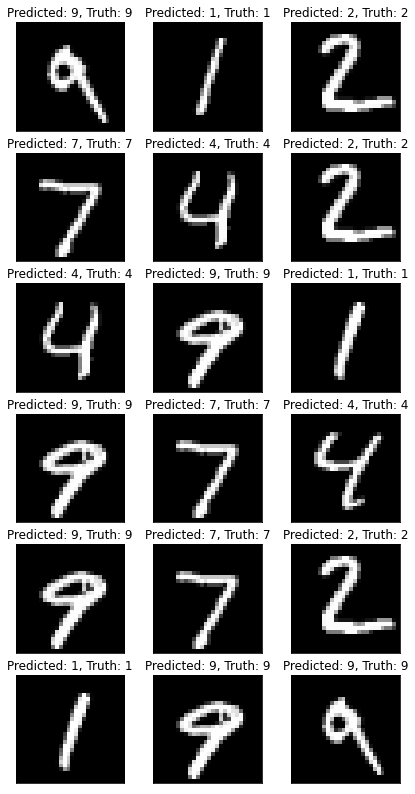

In [74]:
# adapt figure size to accomodate 18 subplots
plt.rcParams['figure.figsize'] = (7,14)

figure_evaluation = plt.figure()

# plot 9 correct predictions
for i, correct in enumerate(correct_indices[:18]):
    plt.subplot(6,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Predicted: {}, Truth: {}".format(predicted_classes[correct],
                                        np.argmax(y_test[correct])))
    plt.xticks([])
    plt.yticks([])

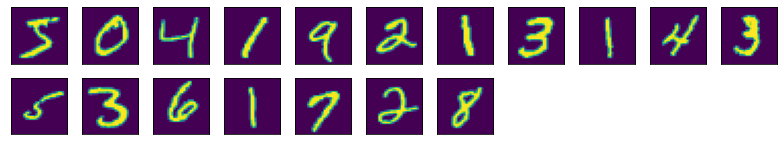

In [26]:
# Now lets take a look at some of our triaining images!
import matplotlib.pyplot as plt
plt.figure(figsize=(11,6))
for i in range(0,18): 
    plt.subplot(6,11,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    
plt.tight_layout()